<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Drugscom_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drugs.com Data Exploration

Description - 

Attribute Information:

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [30]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from wordcloud import WordCloud


In [2]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

Cloning into 'Medicines-and-Common-Treatment-Recommendation-System'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 12), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (37/37), done.
Checking out files: 100% (6/6), done.


In [3]:
!ls Medicines-and-Common-Treatment-Recommendation-System/Drugscom

drugsComTest_raw.tsv  drugsComTrain_raw.tsv


## Data Loading

In [4]:
#Loading Data
Drugscom_train = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom/drugsComTrain_raw.tsv',sep='\t',parse_dates=['date'])
Drugscom_test = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/Drugscom/drugsComTest_raw.tsv',sep='\t',parse_dates=['date'])


In [5]:
#Data set shape
print("Drugscom Train shape :" ,Drugscom_train.shape)
print("Drugscom Test shape :", Drugscom_test.shape)

Drugscom Train shape : (161297, 7)
Drugscom Test shape : (53766, 7)


In [6]:
#Data information
print("Training Data information :")
Drugscom_train.info()


Training Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  float64       
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 8.6+ MB


In [7]:
print("Test Data information :")
Drugscom_test.info()

Test Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   53766 non-null  int64         
 1   drugName     53766 non-null  object        
 2   condition    53471 non-null  object        
 3   review       53766 non-null  object        
 4   rating       53766 non-null  float64       
 5   date         53766 non-null  datetime64[ns]
 6   usefulCount  53766 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.9+ MB


In [8]:
#Changing the "Unnamed: 0" column to uniqueId as it represents the unique id of the drugs
Drugscom_train=Drugscom_train.rename(columns={'Unnamed: 0' : 'uniqueId'})
Drugscom_test=Drugscom_test.rename(columns={'Unnamed: 0' : 'uniqueId'})

In [9]:
print("Drugscom Train shape :" ,Drugscom_train.columns)
print("Drugscom Test shape :", Drugscom_test.columns)

Drugscom Train shape : Index(['uniqueId', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Drugscom Test shape : Index(['uniqueId', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


## Data understanding

### Checking if there are multiple reviews by the customer for particular medicine.

In [10]:
print("Unique IDs in Drugscom training set : " ,len(set(Drugscom_train['uniqueId'].values)))
print("Total length of Drugscom training set  : " ,Drugscom_train.shape[0])

Unique IDs in Drugscom training set :  161297
Total length of Drugscom training set  :  161297


It appears there is only one review by each customer.

## Checking the number of Drugs for each condition

For this analysis, I have combined the training set and testing set.

In [11]:
#Combining training and testing data
Drugscom_combined=pd.concat([Drugscom_train,Drugscom_test])

In [12]:
Drugscom_combined.head()

,uniqueId,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [13]:
Drugscom_combined.shape

(215063, 7)

In [14]:
#To check the number of drugs per condition, I have grouped the data by "condition" column

Drugscom_conditon=pd.DataFrame(Drugscom_combined.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False))

#resetting index
Drugscom_conditon.reset_index(inplace=True)

Drugscom_conditon.head(10)

,condition,drugName
0,Not Listed / Othe,253
1,Pain,219
2,Birth Control,181
3,High Blood Pressure,146
4,Acne,127
5,Depression,115
6,Rheumatoid Arthritis,107
7,"Diabetes, Type 2",97
8,Allergic Rhinitis,95
9,Insomnia,85


In [15]:
#visualizing the top 10 condition having maximum drugs available
fig = px.bar(Drugscom_conditon[:10], x='condition', y='drugName', color='drugName',labels={'drugName':'Count of Drugs'}, height=500, width=1500,title="Top 10 Conditions with highest number of Drugs availability")
fig.show()

##Ratings of Top 10 drugs 

In [18]:
#ratings of top-10 drugs 
top_10_drugs=Drugscom_combined["drugName"].value_counts().sort_values(ascending=False)[:10]
top_10_drugs_df=pd.DataFrame(zip(top_10_drugs.index, top_10_drugs), columns = ["drugName", "count"])
rating_top_10_df=Drugscom_combined.loc[Drugscom_combined["drugName"].isin(top_10_drugs.index), :]
rating_top_10_df

,uniqueId,drugName,condition,review,rating,date,usefulCount
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07,5
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,2014-08-07,10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,2014-08-11,11
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07,3
...,...,...,...,...,...,...,...
53723,84585,Ethinyl estradiol / norgestimate,Abnormal Uterine Bleeding,"""Please avoid Tri Lo Sprintec. I&#039;ve been ...",1.0,2016-08-22,2
53729,167806,Levonorgestrel,Emergency Contraception,"""Had unprotected sex, 18 yrs old, took the pil...",10.0,2015-12-24,7
53741,131040,Levonorgestrel,Birth Control,"""I first would like to thank all of you that p...",3.0,2010-01-20,140
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,2016-10-08,11


Text(0.5, 0, 'drug name')

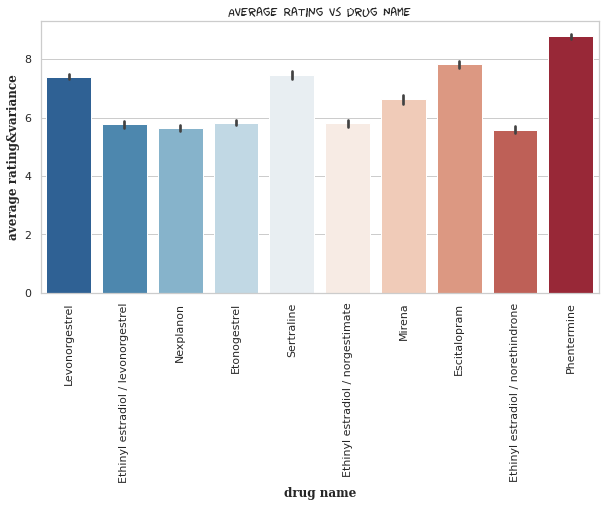

In [23]:
#ratings(average-variance) of top-10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="drugName", y="rating", data=rating_top_10_df, palette=sns.color_palette("RdBu_r", 10))
plt.xticks(rotation=90)
plt.title("Average Rating vs Drug Name", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("average rating&variance", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("drug name", {"fontname": "serif", "fontweight":"bold"})

##Number of reviews overtime

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



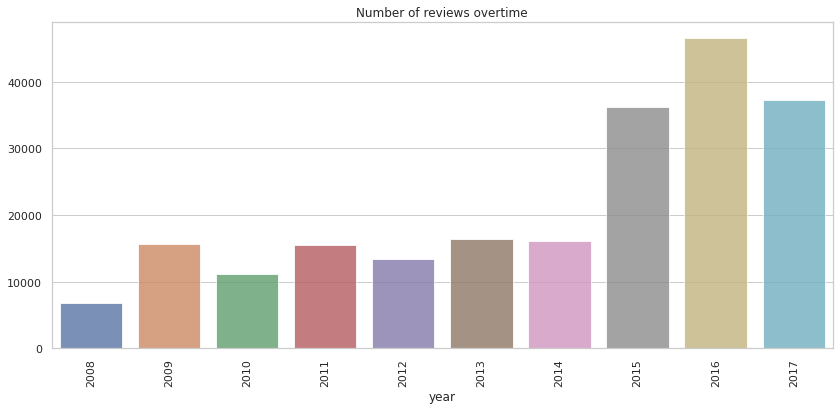

In [27]:

cnt_srs = Drugscom_combined['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('year', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of reviews overtime")
plt.show()

##Count of ratings vs Distribution plot of ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Rating')

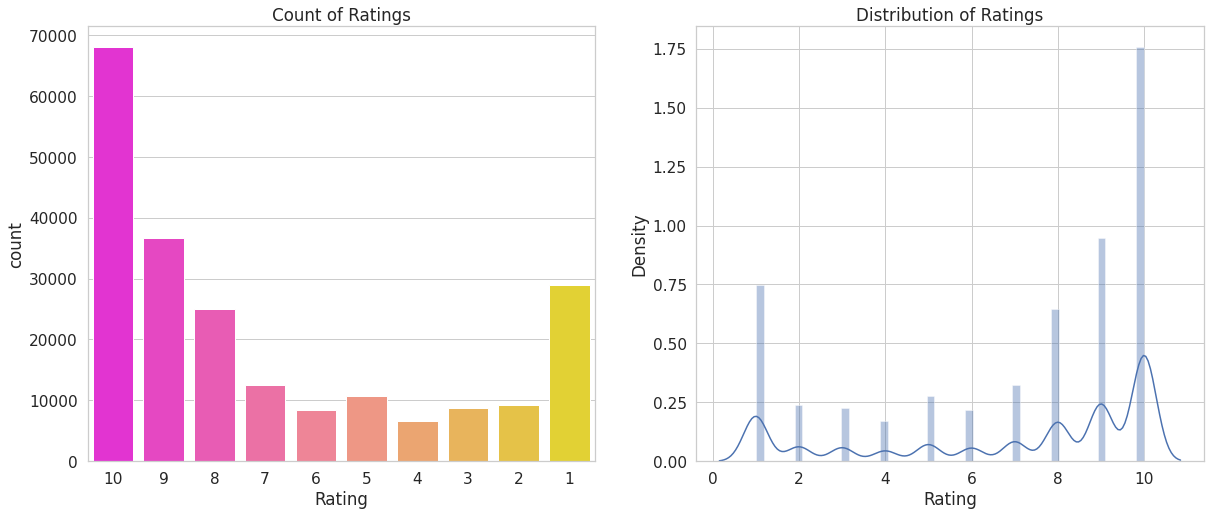

In [28]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(Drugscom_combined['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(Drugscom_combined['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

##Word cloud of the reviews with rating 10



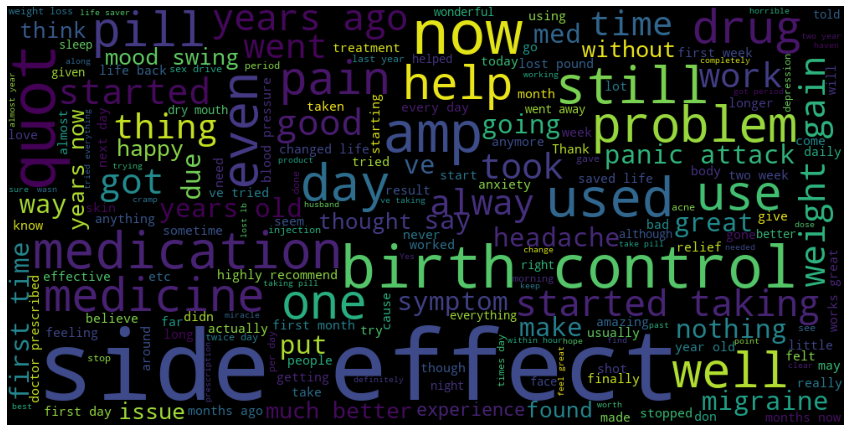

In [31]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = Drugscom_combined.loc[Drugscom_combined.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

In [34]:
Drugscom_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueId     215063 non-null  int64         
 1   drugName     215063 non-null  object        
 2   condition    213869 non-null  object        
 3   review       215063 non-null  object        
 4   rating       215063 non-null  float64       
 5   date         215063 non-null  datetime64[ns]
 6   usefulCount  215063 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 18.1+ MB


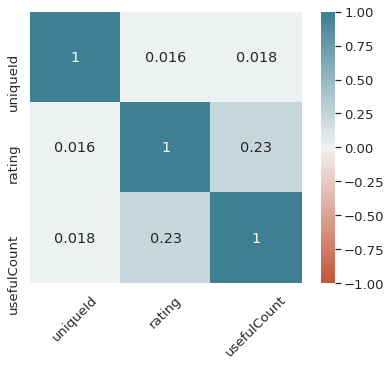

In [35]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = Drugscom_combined.select_dtypes(include = ['int64','float64']).corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

